# Modelos de Efectos Mixtos
## (Ejemplo en R)

Se tiene data proveniente de un estudio a la privación del sueño para una cierta cantidad de personas. En el día $0$ las personas duermen su cantidad normal de horas. Empezando la siguiente noche, se les restringen $3$ horas de sueño por día. La variable de respuesta es el tiempo de reacción (en milisegundos) a ciertos tests.

In [2]:
#----------------------Script con Ejemplo de Modelos de Efectos Mixtos-------------------------
#Carga librerias necesarias para correr modelos de efectos mixtos
#install.packages('lme4')
#install.packages('Matrix')
#install.packages('MuMIn')
#install.packages('lmerTest')
library(lme4)
library(Matrix)
library(MuMIn)
library(lmerTest)

#Examina la data de ejemplo
sleep_study <- sleepstudy ; str(sleep_study)


'data.frame':	180 obs. of  3 variables:
 $ Reaction: num  250 259 251 321 357 ...
 $ Days    : num  0 1 2 3 4 5 6 7 8 9 ...
 $ Subject : Factor w/ 18 levels "308","309","310",..: 1 1 1 1 1 1 1 1 1 1 ...


Se observa que se tienen $830$ observaciones y $3$ regresores: el día, el sujeto y la reacción. 

In [3]:
#Cuenta numero de personas en el experimento y guarda su los identificadores de manera unica
personas <- nlevels(sleep_study$Subject)
ids_personas <- unique(sleep_study$Subject)

print(paste('Personas:', personas))
print(paste('Personas Id: ' , as.character(ids_personas)))

[1] "Personas: 18"
 [1] "Personas Id:  308" "Personas Id:  309" "Personas Id:  310"
 [4] "Personas Id:  330" "Personas Id:  331" "Personas Id:  332"
 [7] "Personas Id:  333" "Personas Id:  334" "Personas Id:  335"
[10] "Personas Id:  337" "Personas Id:  349" "Personas Id:  350"
[13] "Personas Id:  351" "Personas Id:  352" "Personas Id:  369"
[16] "Personas Id:  370" "Personas Id:  371" "Personas Id:  372"


In [4]:
#Examina limites de las reacciones
max_reaccion <- max(sleep_study$Reaction)
min_reaccion <- min(sleep_study$Reaction) 

print(c(max_reaccion , min_reaccion))

[1] 466.3535 194.3322


Se procede a hacer un gráfico de Reacción vs Día para cada sujeto con su recta resultante al aplicar regresión lineal simple.

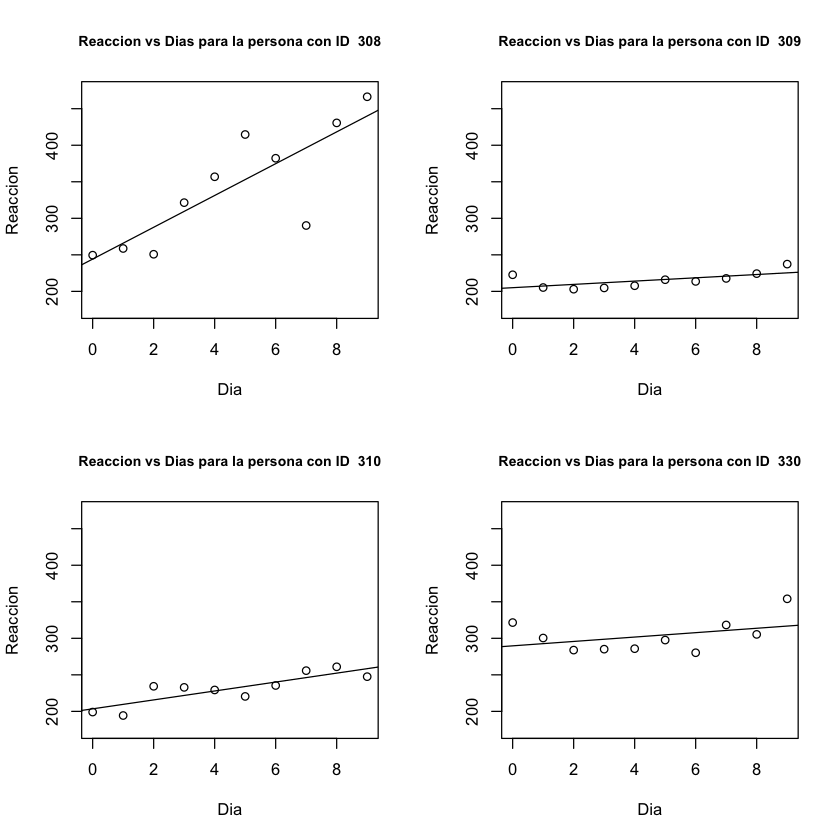

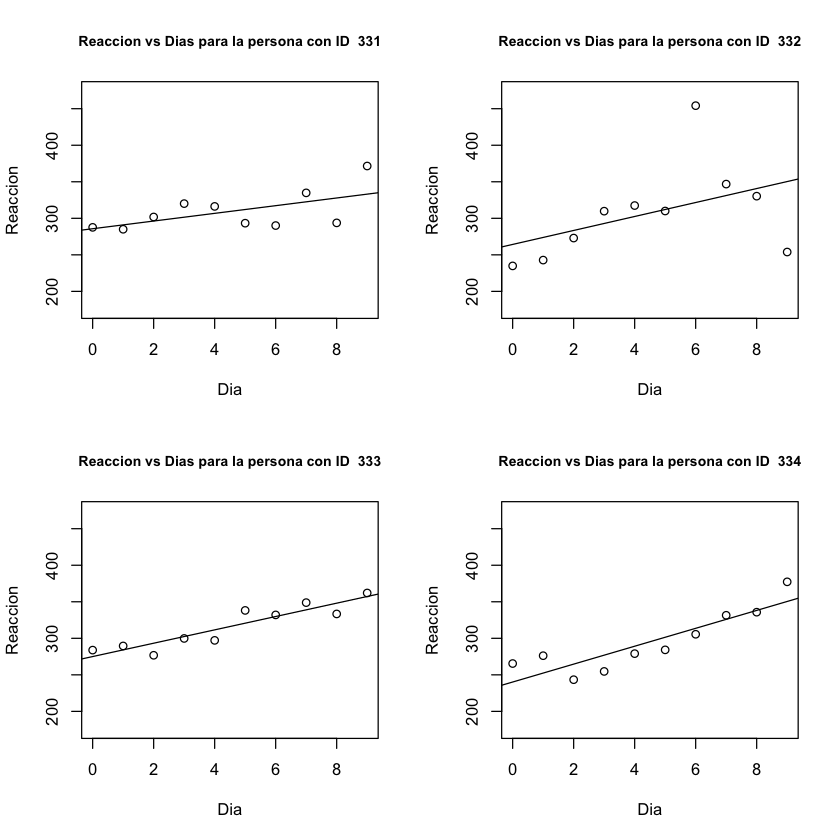

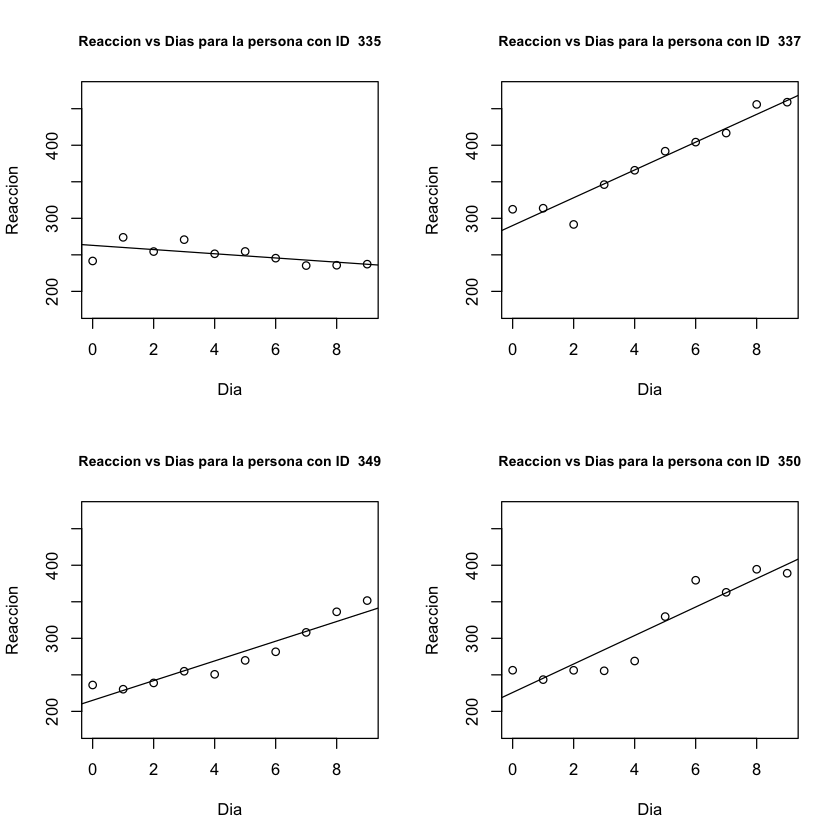

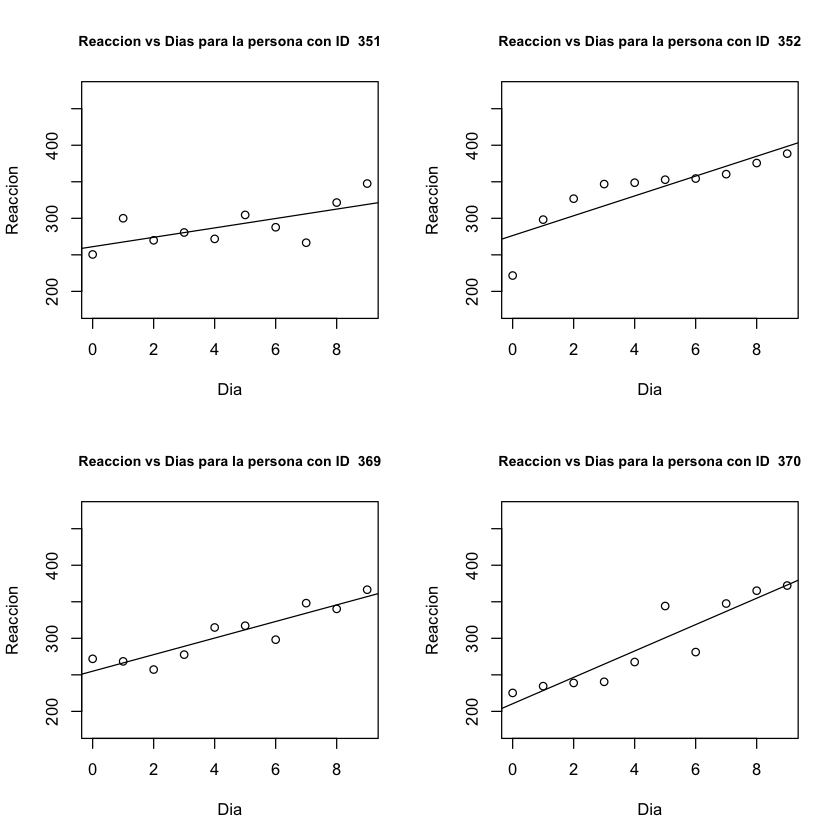

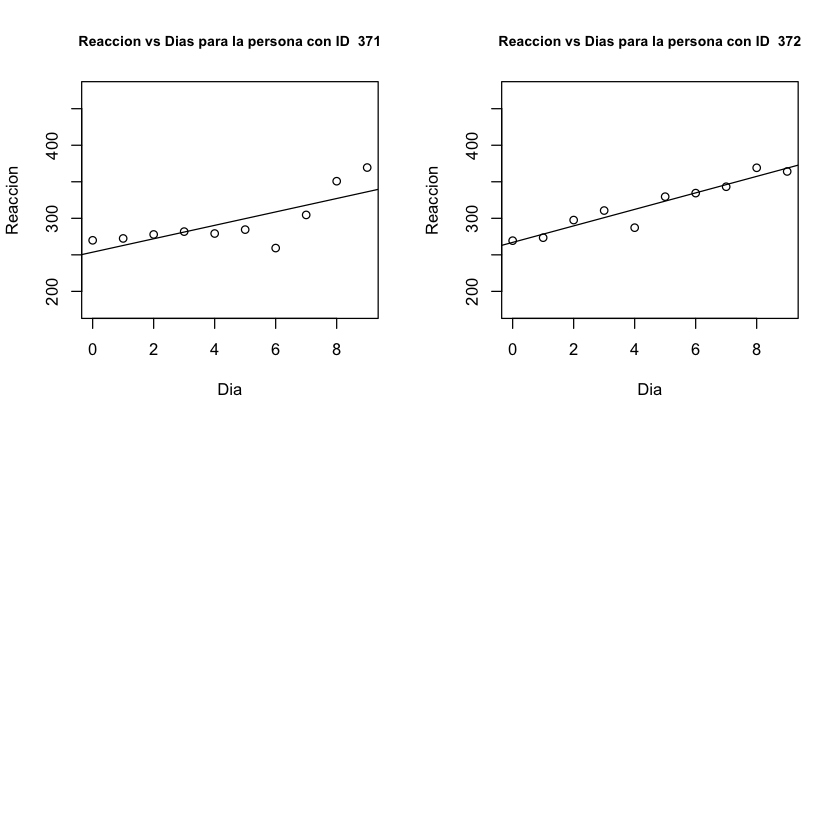

In [7]:
par(mfrow =c(2,2))

#Genera un plot para cada persona de Days vs Reaction que se debe ver en pantalla grande
#y ademas guarda la pendiente e intercepto la regresion lineal
pendientes <- NULL
interceptos <- NULL
for (id in ids_personas) {
  dias_por_id <- sleep_study$Days[sleep_study$Subject == id]
  reacciones_por_id <- sleep_study$Reaction[sleep_study$Subject == id]
  
  titulo <- paste('Reaccion vs Dias para la persona con ID ' , as.character(id))
  
  plot(dias_por_id , reacciones_por_id , ylim = c(175,475) , main = titulo , cex.main = 0.85 ,
      xlab = 'Dia' , ylab = 'Reaccion')
  modelo_lineal_simple <- lm(reacciones_por_id ~ dias_por_id)
  abline(modelo_lineal_simple)
  
  informacion_modelo <- summary(modelo_lineal_simple)
  pendientes <- c(pendientes , informacion_modelo$coefficients[2,1])
  interceptos <- c(interceptos , informacion_modelo$coefficients[1,1])
}

Se oberva que cada persona tiene distintos interceptos y pendientes (incluso una tiene una pendiente negativa). De manera más clara, los interceptos y pendientes son:

In [8]:
#Examina pendientes e interceptos del modelo lineal simple hecho para cada persona
print('Pendientes') ; pendientes
print('Interceptos') ; interceptos

[1] "Pendientes"


[1] 21.764702  2.261785  6.114899  3.008073  5.266019  9.566768  9.142045
 [8] 12.253141 -2.881034 19.025974 13.493933 19.504017  6.433498 13.566549
[15] 11.348109 18.056151  9.188445 11.298073

[1] "Interceptos"


[1] 244.1927 205.0549 203.4842 289.6851 285.7390 264.2516 275.0191 240.1629
 [9] 263.0347 290.1041 215.1118 225.8346 261.1470 276.3721 254.9681 210.4491
[17] 253.6360 267.0448

Se procede a ver todos los datos juntos, acompañados de la regresión lineal correspodiente y su reporte.

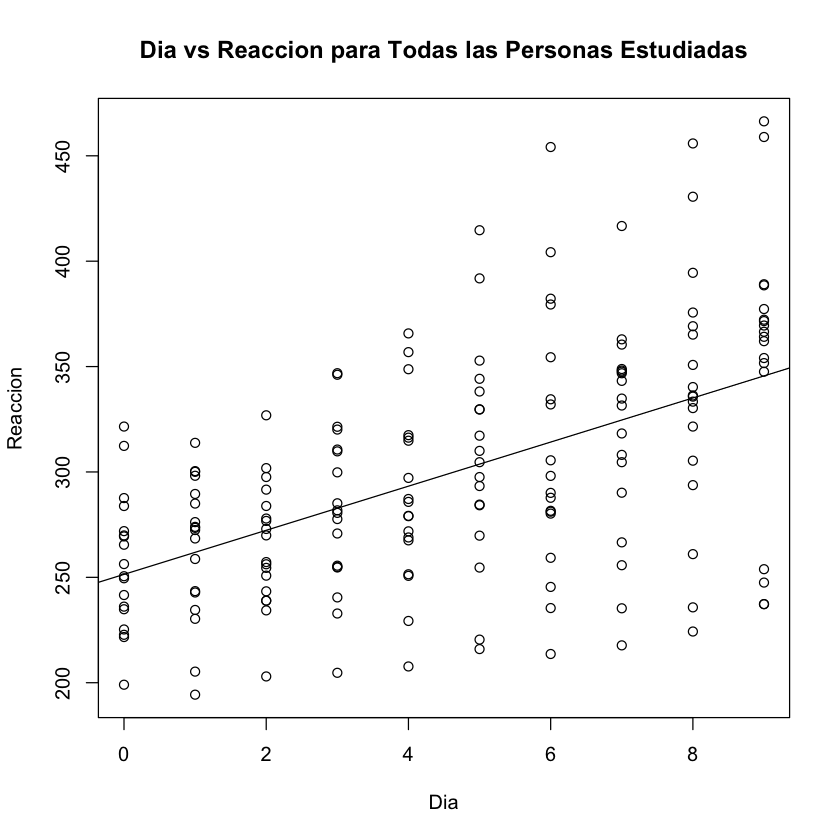

In [9]:
#Evalua Days vs Reaction para todos las personas
par(mfrow = c(1 , 1))
plot(sleep_study$Days , sleep_study$Reaction , main = 'Dia vs Reaccion para Todas las Personas Estudiadas' ,
     xlab = 'Dia' , ylab = 'Reaccion')
modelo_lineal <- lm(Reaction ~ Days , data = sleep_study)
abline(modelo_lineal)


In [10]:
#Evalua que pasa en la regresion linear usando datos de todas las personas
summary(modelo_lineal)
anova(modelo_lineal)


Call:
lm(formula = Reaction ~ Days, data = sleep_study)

Residuals:
     Min       1Q   Median       3Q      Max 
-110.848  -27.483    1.546   26.142  139.953 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  251.405      6.610  38.033  < 2e-16 ***
Days          10.467      1.238   8.454 9.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 47.71 on 178 degrees of freedom
Multiple R-squared:  0.2865,	Adjusted R-squared:  0.2825 
F-statistic: 71.46 on 1 and 178 DF,  p-value: 9.894e-15


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Days,1,162702.7,162702.652,71.46442,9.894096e-15
Residuals,178,405251.6,2276.694,NA,NA


Note que el $p$-valor de el coeficiente de días y el de la regresión son buenos, el $R^2$ (y el ajustado) son muy pequeños. El modelo explica de manera muy vaga la variabilidad de los datos. 

In [11]:
#Se genera un modelo de efectos mixtos y se estudia su resultado
modelo_efectos_mixtos <- lmerTest::lmer(Reaction ~ Days + (Days | Subject) , data = sleep_study)
summary(modelo_efectos_mixtos)
anova(modelo_efectos_mixtos)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Reaction ~ Days + (Days | Subject)
   Data: sleep_study

REML criterion at convergence: 1743.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9536 -0.4634  0.0231  0.4633  5.1793 

Random effects:
 Groups   Name        Variance Std.Dev. Corr
 Subject  (Intercept) 611.90   24.737       
          Days         35.08    5.923   0.07
 Residual             654.94   25.592       
Number of obs: 180, groups:  Subject, 18

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  251.405      6.824  17.005  36.843  < 2e-16 ***
Days          10.467      1.546  16.995   6.771 3.27e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
     (Intr)
Days -0.138

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Days,30024.44,30024.44,1,16.99535,45.84298,3.273014e-06


Note que la $SS$ es mucho menor que en el anova del modelo lineal usual. Por otro lado, se ve que se estima que la desviación estándar del intercepto a través las personas es $24$.$7$. De igual forma, para los días es de $5$.$92$. Se reporta que días sigue siendo significativo. 

In [13]:
modelos_efectos_mixtos <- lme4::lmer(Reaction ~ Days + (Days | Subject) , data = sleep_study)
pseudo_r2 <- as.vector(r.squaredGLMM(modelo_efectos_mixtos))
names(pseudo_r2) <- c('Efectos Fijos' , 'Efectos Mixtos')
print(pseudo_r2)

 Efectos Fijos Efectos Mixtos 
     0.2786382      0.7992289 


El primer valor es un pseudo $R^2$ de la variabilidad explicada por el modelo de efectos fijos. 


El segundo valor es un pseudo $R^2$ de la variabilidad explicada por el modelo de efectos mixtos (el que fue implementado). Mucho más alto que el del modelo lineal usual.